# Climatic Analysis

Performing climatic analysis of Hawaii based on the temperature recorded on different stations

In [76]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.sql import label
from sqlalchemy import func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
from sqlalchemy import Column, Integer, String, Numeric, Text, Float,Table,ForeignKey
from flask import jsonify

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

from datetime import datetime,timedelta

In [77]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [78]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [79]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [80]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [81]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Precipitation analysis

In [82]:
# Design a query to retrieve the last 12 months of precipitation data and plot the result 

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

def precipitation_data():
    current_time = datetime.now()

    past_year = current_time - timedelta(days=365)
    
    # Grabs the last date entry in the data table
    #last_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
    #print(last_date)

    # to get the last 12 months of data, last date - 365
    #last_year = datetime.date(2017, 8, 23) - datetime.timedelta(days=365)
    
    #everytime I tried to pull from last entry - 365 I'd get a weird datetime error :(

    measurements_year = session.query(Measurements.date,Measurements.prcp).filter(
        Measurements.date > past_year).\
    order_by(Measurements.date.desc()).all()

    measure_list = []
    for measure in measurements_year:
        measure_list.append(measure._asdict())

    measurements_df = pd.DataFrame.from_records(measure_list)

    measurements_df = measurements_df.set_index('date')


    return measurements_df

In [83]:
precipitation_data()

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 <a list of 7 Text xticklabel objects>)

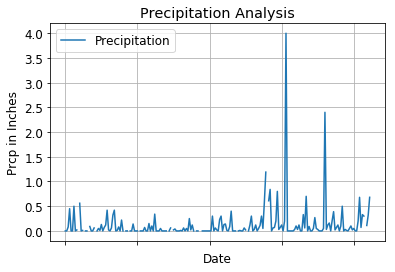

In [100]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates

measurements_df = precipitation_data()
measurements_df.plot()#kind="line",LineWidth=4, figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Prcp in Inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.grid()
plt.xticks(rotation=10)
#plt.show()

In [85]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurements_df.describe()

,prcp
count,196.000000
mean,0.131531
std,0.370424
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


# Station Analysis

In [86]:
# How many stations are available in this dataset?

total_stations = session.query(Stations).distinct().count()
print(f"Number of stations: {total_stations}")

Number of stations: 9


In [87]:
# What are the most active stations?
# List the stations and the counts in descending order.

def stations_frequency():
    active_stations = session.query(Stations.name,Stations.station,label('obersvations',func.count(Measurements.id))).\
                    filter(Measurements.station == Stations.station).\
    group_by(Stations.name,Stations.station).order_by(func.count(Measurements.id).desc())
    
    active_station_records = []
    for station in active_stations:
        active_station_records.append(station._asdict())

    active_station_df = pd.DataFrame.from_records(active_station_records)
    
    return active_station_df

stations_frequency()

,name,obersvations,station
0,"WAIHEE 837.5, HI US",2772,USC00519281
1,"WAIKIKI 717.2, HI US",2724,USC00519397
2,"KANEOHE 838.1, HI US",2709,USC00513117
3,"WAIMANALO EXPERIMENTAL FARM, HI US",2669,USC00519523
4,"MANOA LYON ARBO 785.2, HI US",2612,USC00516128
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202,USC00514830
6,"HONOLULU OBSERVATORY 702.2, HI US",1979,USC00511918
7,"PEARL CITY, HI US",1372,USC00517948
8,"UPPER WAHIAWA 874.3, HI US",511,USC00518838


In [109]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [90]:
# Choose the station with the highest number of temperature observations.

def mostfreq():
    active_station_df = stations_frequency()
    
    freq_station = {'id':"",'name':""}
    freq_station['id'] = active_station_df.iloc[:1]['station'][0]

    freq_station['name'] = active_station_df.iloc[:1]['name'][0]
    
    
    
    return freq_station

mostfreq()

{'id': 'USC00519281', 'name': 'WAIHEE 837.5, HI US'}

In [91]:

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


def temperature_obs():
    current_time = datetime.now()

    past_year = current_time - timedelta(days=365)
    
    freq_station_id = mostfreq()['id']

    measure_freq_station = session.query(Measurements.date,Measurements.tobs).\
                        filter(Measurements.station == freq_station_id).\
                        filter(Measurements.date > past_year).all()

    station_measures = []
    for measure in measure_freq_station:
        station_measures.append(measure._asdict())

    station_measures_df = pd.DataFrame.from_records(station_measures)

    station_measures_df = station_measures_df.set_index('date')


    return station_measures_df
    

temperature_obs()

,tobs
date,
2017-07-13,74.0
2017-07-14,76.0
2017-07-15,80.0
2017-07-16,80.0
2017-07-17,76.0
2017-07-18,76.0
2017-07-19,76.0
2017-07-20,77.0
2017-07-21,77.0


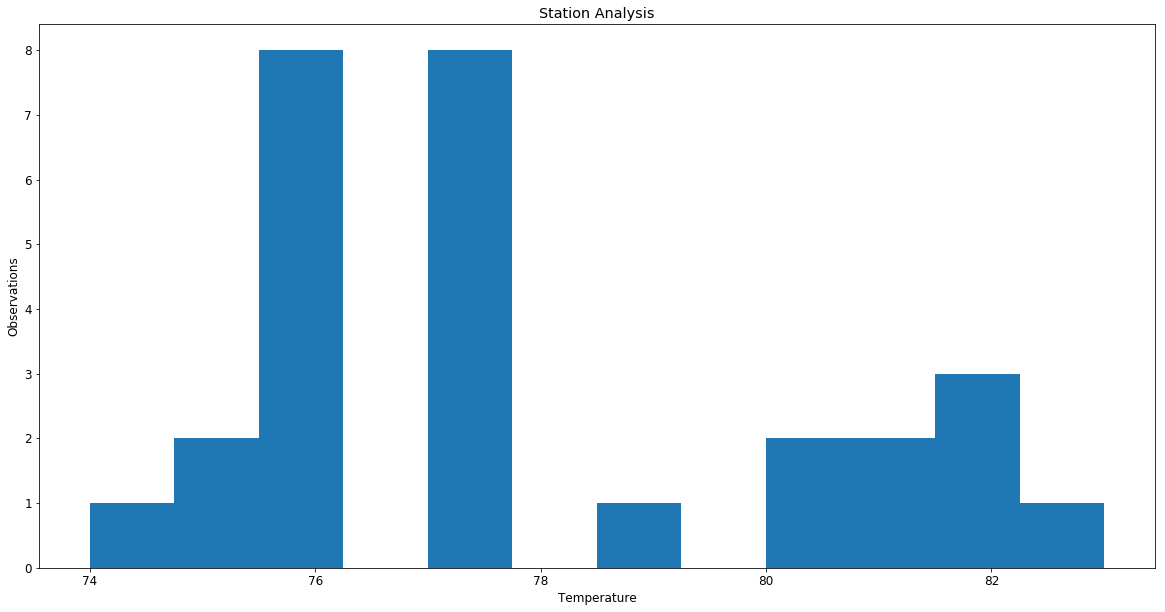

In [92]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



temp_df=pd.DataFrame(temperature_obs())
plt.figure(figsize=(20,10))
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.title("Station Analysis")
plt.show()

# Trip analysis

In [95]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [104]:


def calc_temps(startdate,enddate):
    compstart = startdate - timedelta(days=365)
    compend = enddate - timedelta(days=365)
    
    temperature_vacation = session.query(label('max_temp',func.max(Measurements.tobs)),\
                                     label('min_temp',func.min(Measurements.tobs)),\
                                     label('avg_temp',func.avg(Measurements.tobs))).\
                    filter(Measurements.date >= compstart).\
                    filter(Measurements.date <= compend)

# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.    
    
    Max_temp = temperature_vacation[0].max_temp
    Min_temp = temperature_vacation[0].min_temp
    Avg_temp = temperature_vacation[0].avg_temp
    
#print(calc_temps(datetime(2017,1,1),datetime(2017,1,20)))

# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)    
    
    yerror = Max_temp - Min_temp
    
    barvalue = [Avg_temp]
    x = range(len(barvalue))
    
    fig,ax = plt.subplots(figsize=(5,10))
    ax.bar(x, barvalue, yerr=yerror, color='g',alpha=0.6)
    ax.set_xticks([1]) 
    plt.xlabel("Vacation Length of Time")
    plt.ylabel("Temp (F)")
    plt.title("Trip Avg Temp")
    plt.tight_layout()

    
    plt.show()

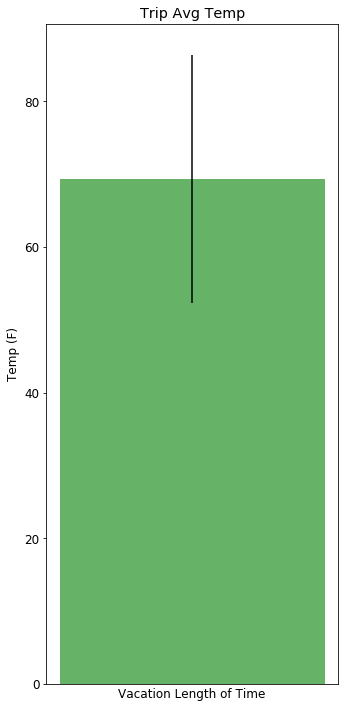

In [105]:
calc_temps(datetime(2017,1,1),datetime(2017,1,20))

In [106]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


def calcrainfall(startdate,enddate):
    compstart = startdate - timedelta(days=365)
    compend = enddate - timedelta(days=365)
    
    rainfall_per_station = session.query(Stations.name,Stations.station,label('avg_rainfall',func.avg(Measurements.prcp)),Stations.latitude, Stations.longitude, Stations.elevation).\
                    filter(Measurements.station == Stations.station).\
                    filter(Measurements.date >= compstart).\
                    filter(Measurements.date <= compend).\
    group_by(Stations.name,Stations.station).order_by(func.avg(Measurements.prcp))
    
    
    rainfall_measures = []
    for measure in rainfall_per_station:
        rainfall_measures.append(measure._asdict())

    rain_measures_df = pd.DataFrame.from_records(rainfall_measures)

    rain_measures_df = rain_measures_df.set_index('station')


    return rain_measures_df
    
    #df = pd.DataFrame(query_to_dict(rainfall_per_station))
    #df = pd.DataFrame(rainfall_per_station)
       
    
        


In [107]:
calcrainfall(datetime(2018,1,1),datetime(2018,1,20))

,avg_rainfall,elevation,latitude,longitude,name
station,,,,,
USC00517948,0.000000,11.9,21.39340,-157.97510,"PEARL CITY, HI US"
USC00519397,0.000000,3.0,21.27160,-157.81680,"WAIKIKI 717.2, HI US"
USC00513117,0.003158,14.6,21.42340,-157.80150,"KANEOHE 838.1, HI US"
USC00519281,0.010526,32.9,21.45167,-157.84889,"WAIHEE 837.5, HI US"
USC00516128,0.035789,152.4,21.33310,-157.80250,"MANOA LYON ARBO 785.2, HI US"
USC00514830,0.042000,7.0,21.52130,-157.83740,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
USC00519523,0.061000,19.5,21.33556,-157.71139,"WAIMANALO EXPERIMENTAL FARM, HI US"
